<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Hany_Hamed_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Write LQR for a time-variant system. Use either an iterative version (recomputing k every few time steps) or use TV LQR

# Solution

The system is:

$$\begin{bmatrix} \dot x \\ \ddot x \end{bmatrix} = 
\begin{bmatrix} 
sin(t) & 1 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x \\ \dot x \end{bmatrix} + 
\begin{bmatrix} 
1 & 0 \\
0 & 1 
\end{bmatrix} u$$


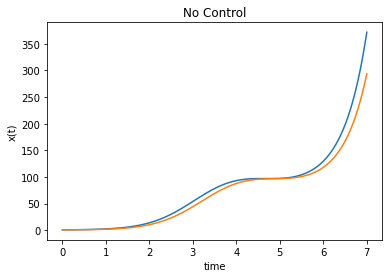

In [10]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin
from scipy.linalg import solve_continuous_are, inv


def A(t):
  return np.array([[sin(t), 1], [5, -5]]) # state matrix

B = np.array([[1, 0], [0, 1]]) 

def LTV_no_control(x, t):
    return A(t).dot(x)


  
time = np.linspace(0, 7, 1000)    # interval from 0 to 5
x0 = np.random.rand(2)            # initial state


solution = odeint(LTV_no_control, x0, time)
x_desired_vector_plt = [0,0]

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('No Control')
plt.show()


**Using Iterative verion of LQR**


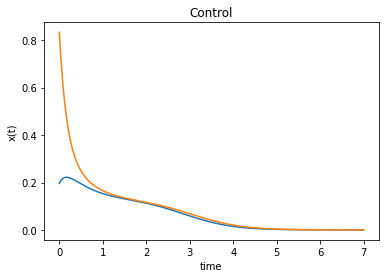

In [24]:
time_step = 0.005
time_start = 0
time_range = [time_start, time_start+time_step]
flag = 1

Q = np.array([[1, 0], [0, 1]])  # Weights for states
R = np.array([[1, 0], [0, 1]])  # Weights for Resources


def calcK(t):
  s = (solve_continuous_are(A(t),B,Q,R))
  k = (inv(R)*(B.T*s))
  return k

k = calcK(0)
u = -k

def LTV_control(x, t):
  global flag
  global u
  global time_range

  # elif(flag == 1 and t >= time_range[0] and t <= time_range[1]):
    # nothing
  if(flag == 1 and t > time_range[1]):
    flag = 0
    time_range[0] = time_range[1]
    time_range[1] = time_range[0] + time_step

  if(flag == 0 and t >= time_range[0] and t <= time_range[1]):
    global u
    flag = 1
    u = -calcK(t)
  
  # print(u)  
  return A(t).dot(x) + B.dot(u.dot(x))


  
time = np.linspace(0, 7, 1000)    # interval from 0 to 5
x0 = np.random.rand(2)            # initial state


solution = odeint(LTV_control, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('Control')
plt.show()
